<a href="https://colab.research.google.com/github/namgisung/convex-hull/blob/main/convex%20hull%20graham%20scan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

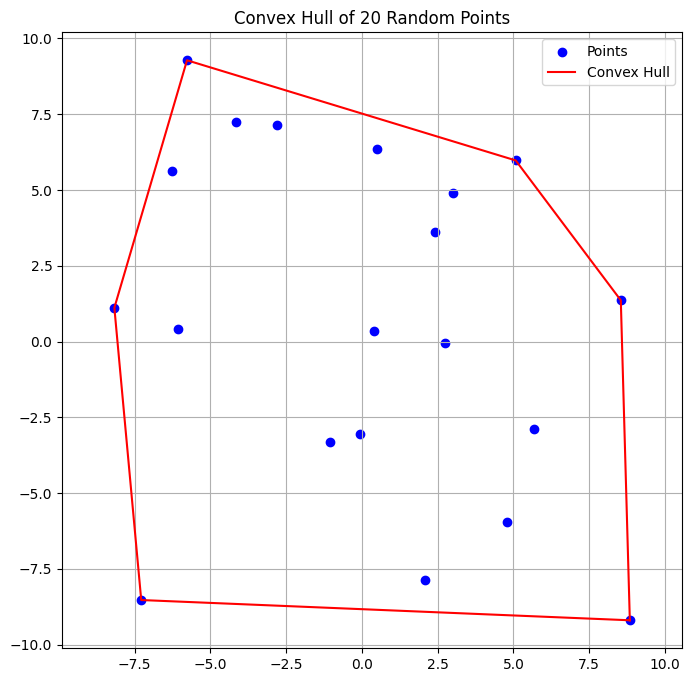

In [ ]:
import math
import random
import matplotlib.pyplot as plt
from typing import List

class Point:
    def __init__(self, x: float, y: float):
        self.x = x
        self.y = y

def cross(p1: Point, p2: Point, p3: Point) -> float:
    """
    Returns the cross product of the vectors (p2-p1) and (p3-p1).
    """
    return (p2.x - p1.x) * (p3.y - p1.y) - (p2.y - p1.y) * (p3.x - p1.x)

def graham_scan(points: List[Point]) -> List[Point]:
    """
    Computes the convex hull of a set of points using the Graham Scan algorithm.
    """
    if len(points) <= 3:
        return points

    # Find the point with the smallest y-coordinate (and smallest x-coordinate if there are ties)
    p0 = min(points, key=lambda p: (p.y, p.x))

    # Sort the points by the angle they make with p0 (in ascending order)
    points.sort(key=lambda p: (math.atan2(p.y - p0.y, p.x - p0.x), (p.y - p0.y) ** 2 + (p.x - p0.x) ** 2))

    hull = [p0, points[1]]
    for i in range(2, len(points)):
        while len(hull) > 1 and cross(hull[-2], hull[-1], points[i]) <= 0:
            hull.pop()
        hull.append(points[i])

    return hull

# Generate random points
num_points = 20
points = [Point(random.uniform(-10, 10), random.uniform(-10, 10)) for _ in range(num_points)]

# Compute the convex hull
hull = graham_scan(points)

# Plot the points and the convex hull
plt.figure(figsize=(8, 8))
plt.scatter([p.x for p in points], [p.y for p in points], color='b', label='Points')
plt.plot([p.x for p in hull] + [hull[0].x], [p.y for p in hull] + [hull[0].y], color='r', label='Convex Hull')
plt.axis('equal')
plt.grid()
plt.legend()
plt.title(f'Convex Hull of {num_points} Random Points')
plt.show()
